# **Machine Learning with Python (MLP1) (Assignment No 01)**

> ### **Problem 01:**

>Take any image from internet (quote the source of the image, from where you have taken). Do the clustering on the image similar to what we have done on the image “china.jpg”. 

> #### **Loading Libraries:**

In [82]:
### Dependencies

import numpy as np
import matplotlib.pyplot as plt  # For Graphics
from skimage.io import imread    # Read image      
from skimage.io import imshow    # Display image
from skimage.io import imsave    # Save image

from sklearn.model_selection import train_test_split # For splitting the dataset

from sklearn.cluster import KMeans # For Problem 1 
from sklearn.neighbors import KNeighborsClassifier # For Problem 2
from sklearn.datasets import load_breast_cancer # Dataset for Problem 2

> #### **Loading Data:**
> ##### **Source:**  https://en.wikipedia.org/wiki/Keoladeo_National_Park

In [67]:
### Read the image file

image = plt.imread("image.jpg")
image.shape  # Printing the shape of data

### This a image of Common parakeet at Keoladeo National Park taken from Wikipedia

(600, 800, 3)

> #### **Reshaping the Input Image:**

In [68]:
### Reshape the input image

newImage = image.reshape(image.shape[0] * image.shape[1],
                         image.shape[2]
                         )
newImage.shape # Reshaped dimentions

(480000, 3)

> #### **Normalization:**

In [69]:
### Normalize all image colors

newImage = newImage/255

> #### **K-Means Clustering:**

In [74]:
### KMeans Clustering 

clusters = 5  # Change it and re-run the cells to see effect of clusters on generated image

def doCluster(X, nclust=64):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doCluster(newImage, clusters)

> #### **Extracting RGB Values againts Clusters:**

In [75]:
### Getting RGB Values for each cluster

b = np.zeros((newImage.shape[0], 3))

for i in range(newImage.shape[0]):
    b[i] = cent[clust_labels[i]]

> ### **Reconstructing the Image:**

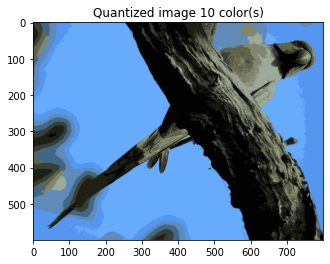

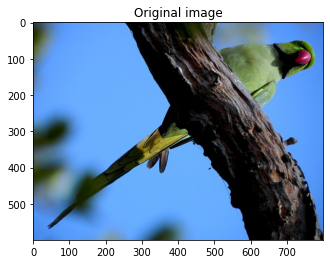

In [76]:
### Getting image back by reshaping
 
modiImage = b.reshape(image.shape[0], image.shape[1], 3)

### Showing K-colour image

plt.figure(1)
plt.title('Quantized image {0} color(s)'.format(clusters))
plt.imshow(modiImage)

### Show original image
plt.figure(2)
plt.title("Original image")
plt.imshow(image)

> #### **Show with example what happens when we change the clusters**

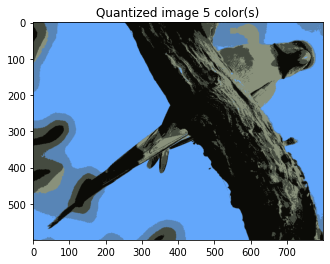

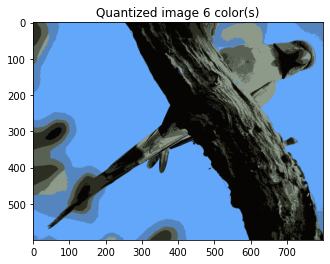

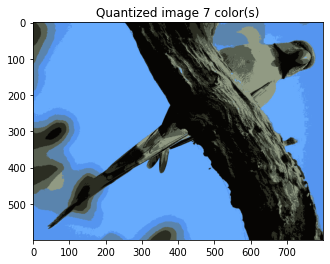

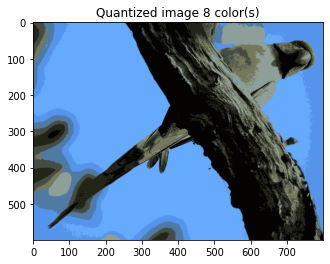

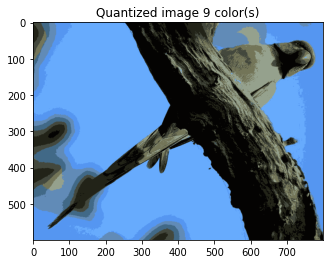

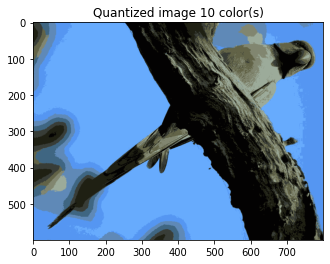

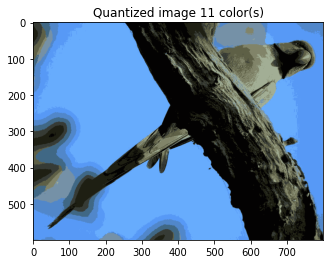

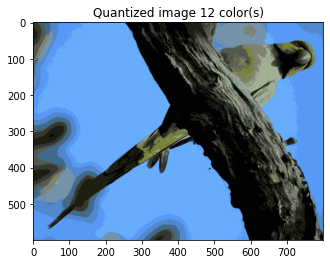

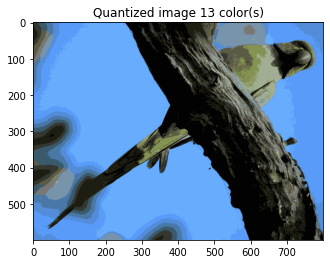

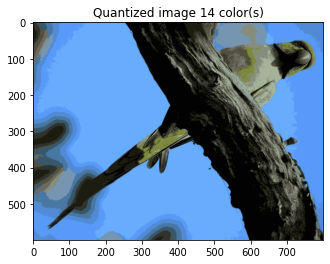

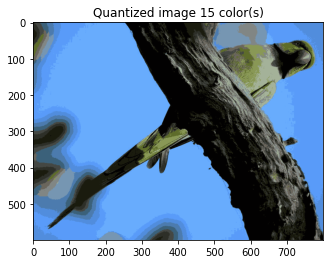

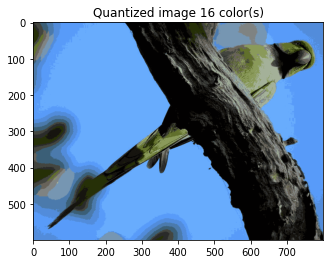

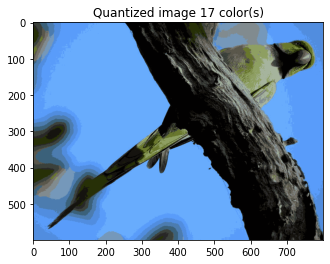

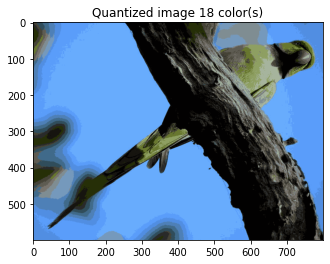

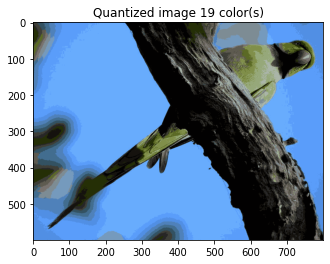

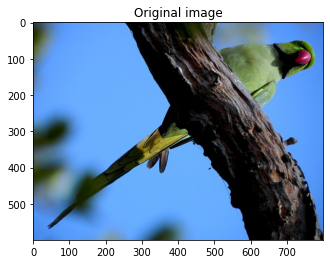

In [79]:
### This code is same as before
### We are only iterating through different cluster values
### And plotting the generated image

for clus in range (5,20): # Change this range to see the effect of clusters on image
    clusters = clus
    clust_labels, cent = doCluster(newImage, clusters)
    b = np.zeros((newImage.shape[0], 3))
    for i in range(newImage.shape[0]):
        b[i] = cent[clust_labels[i]]
    modiImage = b.reshape(image.shape[0], image.shape[1], 3)
    plt.figure(clus)
    plt.title('Quantized image {0} color(s)'.format(clus))
    plt.imshow(modiImage)
    plt.figure(clus+1)
    plt.title("Original image")
    plt.imshow(image)

> #### **Conclusion:** As we are increasing the number of clusters the K-means is learning to make more clusters and hence able to classifiy more color categories. We can see with 1 cluster, the model learnt only 1 color, but as we are increasing the clusters we are indeed increasing the color range of the output generated image. Forexample if we have a color rich image with alot of different colors in it then it is good if we set a big cluster value in K-means so that we can capture almost all the colors from the input image.

> #### **Exporting the Image**

In [80]:
### Exporting the generated Image

plt.imsave("modiImage.jpeg", modiImage)

****
****
****

> ### **Problem 02:**

> Take the breast_cancer data as we have discussed in the class.  Create a K-NN classifier to classify the data. Find the accuracy both on the train as well as test data.

> #### **Loading the dataset**

In [83]:
### Loading the data and doing some data exploration

cancer = load_breast_cancer()

print(cancer.data.ndim)
print(cancer.data.shape)
print(cancer.feature_names)
print(cancer.target_names)
print(cancer.target)

2
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 

> #### **Train-Test Data Split**

In [84]:
### Splitting the data into train and test set with default split percentage of 75/25

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state=42)

> #### **K-Neighbor Classifier**

In [89]:
### Building the model
n_neighbors = 3
clf = KNeighborsClassifier(n_neighbors=n_neighbors)

> #### **Training the Model**

In [90]:
### Training the Classifier on training sets

clf.fit(X_train, y_train)
print(clf) # Printing model parameters 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


> #### **Accuracy on training and test set:**

In [97]:
### record training set accuracy
train_accuracy = clf.score(X_train, y_train)
print('The accuracy on training set is: {0}%'.format(round(train_accuracy,4)*100))


### record generalization accuracy
test_accuracy = clf.score(X_test, y_test)
print('The accuracy on test set is: {0}%'.format(round(test_accuracy,4)*100))

The accuracy on training set is: 95.07%
The accuracy on test set is: 93.01%
